In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("clustered_data.csv")

In [3]:
data

Unnamed: 0                                           headline  \
0             0                           Zika Outbreak Hits Miami   
1             1                    Could Zika Reach New York City?   
2             2                  First Case of Zika in Miami Beach   
3             3            Mystery Virus Spreads in Recife, Brazil   
4             4            Dallas man comes down with case of Zika   
..          ...                                                ...   
600         600  Rumors about Rabies spreading in Jerusalem hav...   
601         601              More Zika patients reported in Indang   
602         602  Suva authorities confirmed the spread of Rotav...   
603         603         More Zika patients reported in Bella Vista   
604         604                     Zika Outbreak in Wichita Falls   

              city  latitude  longitude countrycode  cluster  
0            Miami  25.77427  -80.19366          US        0  
1    New York City  40.71427  -74.00597          US        0  
2      Miami Beach  25.79065  -80.13005          US        0  
3           Recife  -8.05389  -34.88111          BR        1  
4           Dallas  32.78306  -96.80667          US        0  
..             ...       ...        ...         ...      ...  
600      Jerusalem  31.76904   35.21633          IL       11  
601         Indang  14.19528  120.87694          PH        4  
602           Suva -18.14161  178.44149          FJ       13  
603    Bella Vista  18.45539  -69.94540          DO        0  
604  Wichita Falls  33.91371  -98.49339          US        0  

[605 rows x 7 columns]

In [4]:
print('Missing Values:')
data.isna().sum()

Missing Values:


Unnamed: 0     0
headline       0
city           0
latitude       0
longitude      0
countrycode    0
cluster        0
dtype: int64

In [4]:
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


In [5]:
from math import cos, sin, asin

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [6]:
from math import pi
distance = great_circle_distance(0, 0, pi, pi)
print(f"The distance equals {distance} units")

The distance equals 3.141592653589793 units


In [17]:
def cluster_location(clusterer, data, lat_string="latitude", lon_string="longitude"):
    """
    Fit a clustering algorithm on location data.
    """
    features = data[[lat_string, lon_string]].copy()
    clusterer.fit(features)
    # Assign the cluster labels
    data["cluster"] = clusterer.labels_
    return data

In [7]:
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)

In [8]:
to_radians =  np.radians([latitude_north, longitude_north,
                          latitude_south, longitude_south])
distance = great_circle_distance(*to_radians.tolist())
print(f"The unit-circle distance between poles equals {distance} units")

The unit-circle distance between poles equals 3.141592653589793 units


In [9]:
earth_distance = 3956 * distance
print(f"The distance between poles equals {earth_distance} miles")

The distance between poles equals 12428.14053760122 miles


In [12]:
to_radians =  np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())

assert travel_distance(90, 0, -90, 0) == earth_distance

IndentationError: unexpected indent (<ipython-input-12-6a216573e462>, line 2)

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


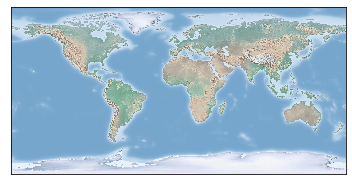

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

%matplotlib inline

# Simple world map
m = Basemap()
_ = m.shadedrelief()

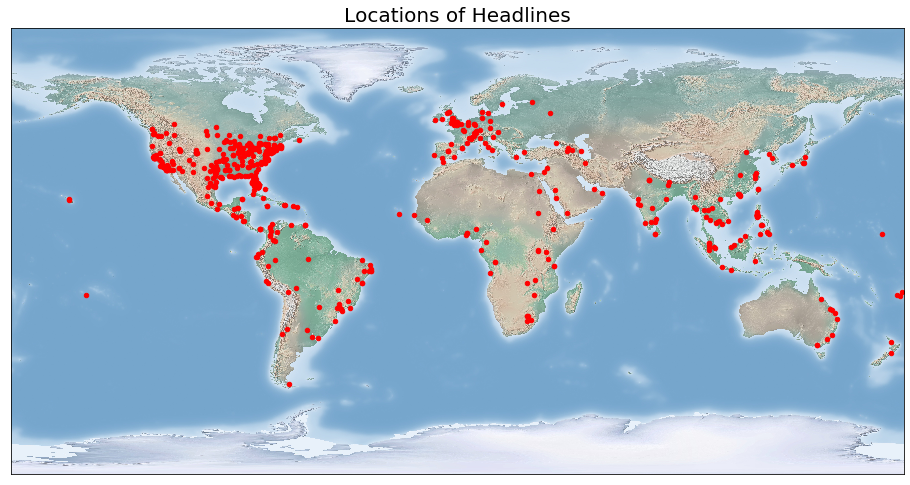

In [23]:
import matplotlib.pyplot as plt

# Make an empty figure
plt.figure(figsize=(16, 10))

# Convert the longitude, latitude to map projection coordinates
x, y = m(x=data["longitude"], y=data["latitude"])

m.shadedrelief()

# Plot the headline locations
plt.scatter(x, y, 20, marker="o", color="red")

# Grab the current axis to set the title (gca)
ax = plt.gca()
_ = ax.set_title("Locations of Headlines", size=20)

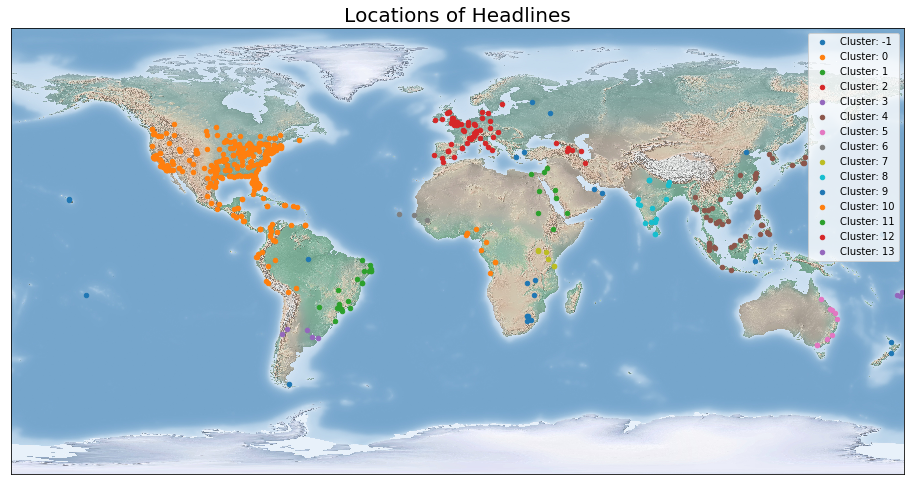

In [24]:
plt.figure(figsize=(16, 10))

m.shadedrelief()
data["x"], data["y"] = x, y

# Iterate through each cluster and plot
for cluster, grouped in data.groupby("cluster"):
    plt.scatter(grouped["x"], grouped["y"], 20, marker="o", label=f"Cluster: {cluster}")

# Grab the figure to set the title and make a legend
ax = plt.gca()
ax.legend()
_ = ax.set_title("Locations of Headlines", size=20)

In [25]:
def plot_clusters(data):
    """
    Plot clustered data on a basemap.
    """
    plt.figure(figsize=(16, 10))
    m.shadedrelief()

    # Iterate through each cluster and plot
    for cluster, grouped in data.groupby("cluster"):
        if cluster == -1:
            # Handle the unassigned headlines
            plt.scatter(
                grouped["x"],
                grouped["y"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: None",
                c="k",
            )
        else:
            plt.scatter(
                grouped["x"],
                grouped["y"],
                s=60,
                alpha=0.8,
                marker="o",
                label=f"Cluster: {cluster}",
            )

    # Add a legend and title (put legend to right of plot)
    ax = plt.gca()
    ax.legend(loc=(1, 0))
    _ = ax.set_title("Locations of Headlines", size=20)

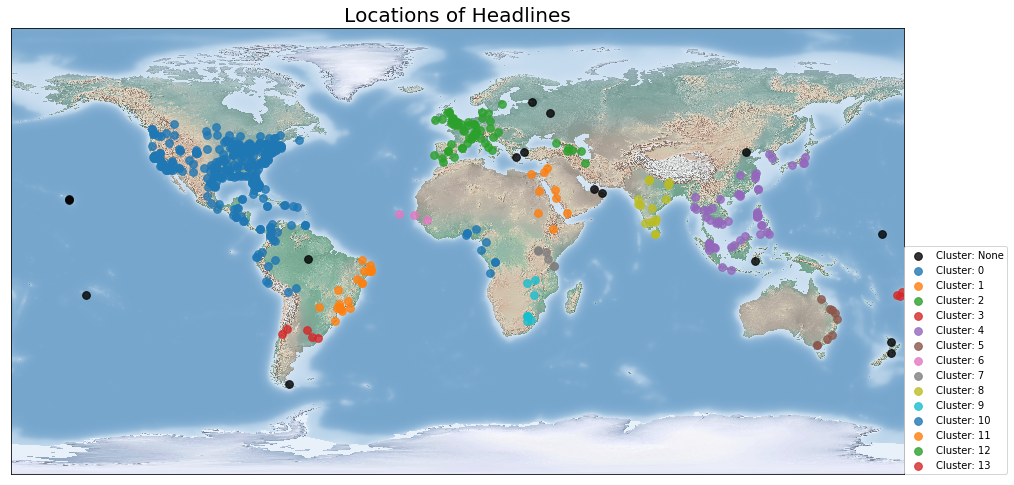

In [27]:
plot_clusters(data)
plt.savefig('euclidean_clustering_map.png')

In [28]:
import numpy as np

def great_circle_distance(coord1, coord2, radius=3956):
    """
    Calculates the great circle distance between two coordinates or arrays of coordinates.
    """
    if np.array_equal(coord1, coord2):
        return 0.0

    # Convert lat/lon to radians
    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    # Find the difference between the coordinates
    delta_x, delta_y = coord2 - coord1
    
    # Apply Haversin formula
    haversin = np.sin(delta_x / 2) ** 2 + np.product(
        [np.cos(coord1[0]), np.cos(coord2[0]), np.sin(delta_y / 2) ** 2]
    )

    # Convert to distance in miles
    return 2 * radius * np.arcsin(haversin ** 0.5)

In [29]:
data.head()

Unnamed: 0                                 headline           city  \
0           0                 Zika Outbreak Hits Miami          Miami   
1           1          Could Zika Reach New York City?  New York City   
2           2        First Case of Zika in Miami Beach    Miami Beach   
3           3  Mystery Virus Spreads in Recife, Brazil         Recife   
4           4  Dallas man comes down with case of Zika         Dallas   

   accented_city  latitude  longitude countrycode        pop  cluster  \
0          Miami  25.77427  -80.19366          US   441003.0        0   
1  New York City  40.71427  -74.00597          US  8175133.0        0   
2    Miami Beach  25.79065  -80.13005          US    92312.0        0   
3         Recife  -8.05389  -34.88111          BR  1478098.0        1   
4         Dallas  32.78306  -96.80667          US  1300092.0        0   

          x         y  
0 -80.19366  25.77427  
1 -74.00597  40.71427  
2 -80.13005  25.79065  
3 -34.88111  -8.05389  
4 -96.80667  32.78306

In [30]:
coord1 = np.array(
    [
        [data["latitude"].iloc[0], data["latitude"].iloc[1]],
        [data["longitude"].iloc[0], data["longitude"].iloc[1]],
    ]
)

coord2 = np.array(
    [
        [data["latitude"].iloc[2], data["latitude"].iloc[0]],
        [data["longitude"].iloc[2], data["longitude"].iloc[0]],
    ]
)

# Calculate distance between points
great_circle_distance(coord1, coord2)

array([   1.14462609, 1031.53567987])

In [36]:
great_circle_clusterer = DBSCAN(
    eps=250, min_samples=4, metric=great_circle_distance,
)

# Cluster using great circle distance
data = cluster_location(
     great_circle_clusterer, data, lon_string="longitude", lat_string="latitude"
)

data["cluster"].value_counts()

 0     237
-1     133
 5      59
 2      49
 4      16
 10     11
 6      11
 8      10
 9       9
 11      8
 16      8
 3       8
 7       7
 1       6
 14      5
 12      4
 20      4
 18      4
 13      4
 15      4
 17      4
 19      4
Name: cluster, dtype: int64

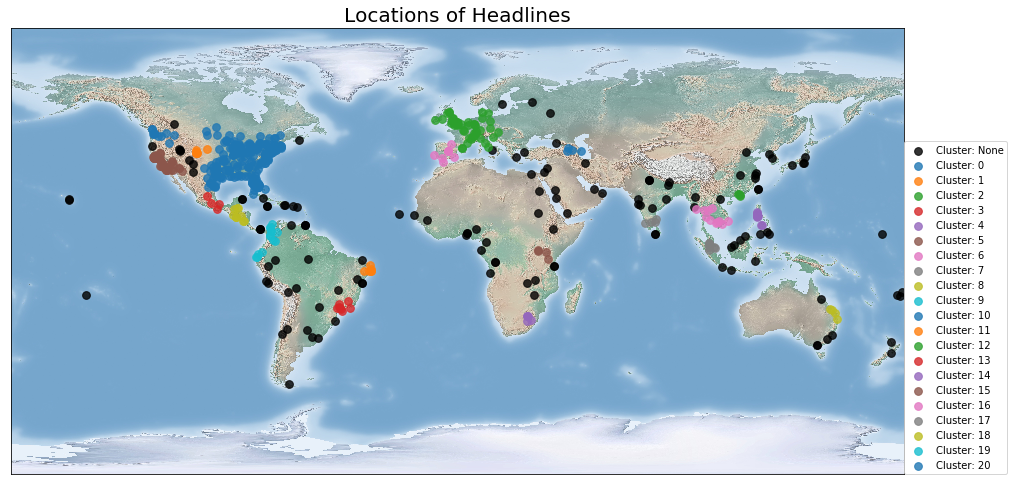

In [37]:
_ = plot_clusters(data)

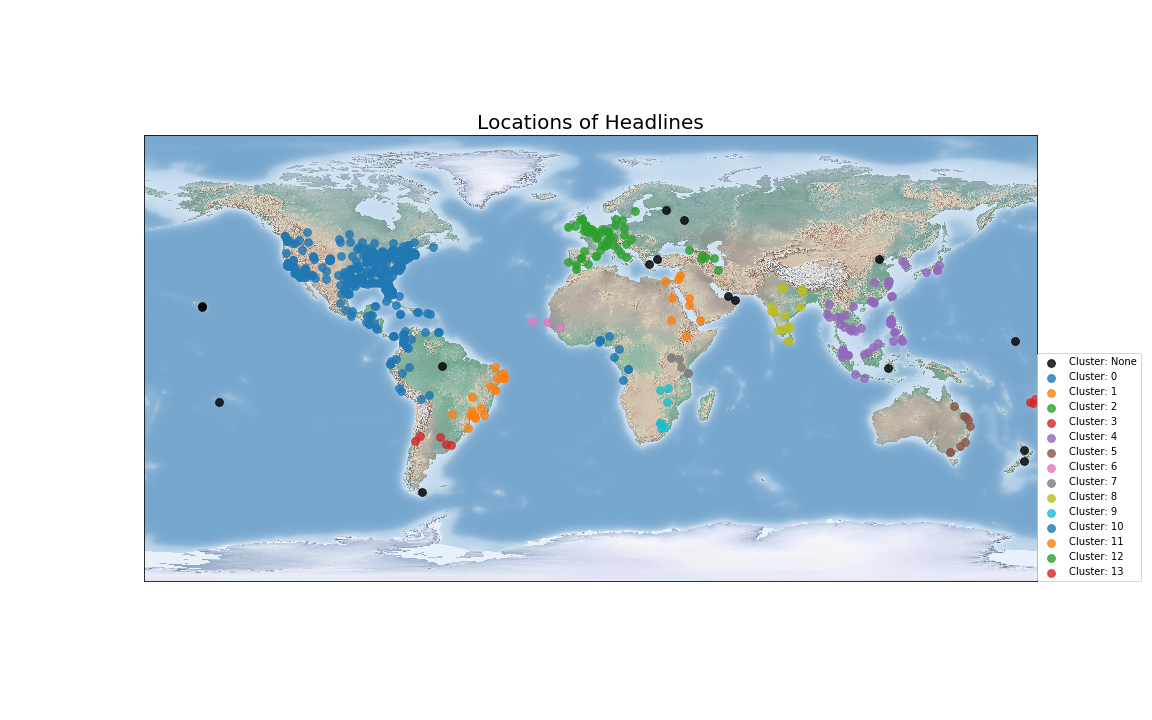

In [39]:
from IPython.display import Image
Image('euclidean_clustering_map.png')

In [40]:
manhattan_clusterer = DBSCAN(
    eps=9, min_samples=3, metric="manhattan",
)
data = cluster_location(manhattan_clusterer, data)

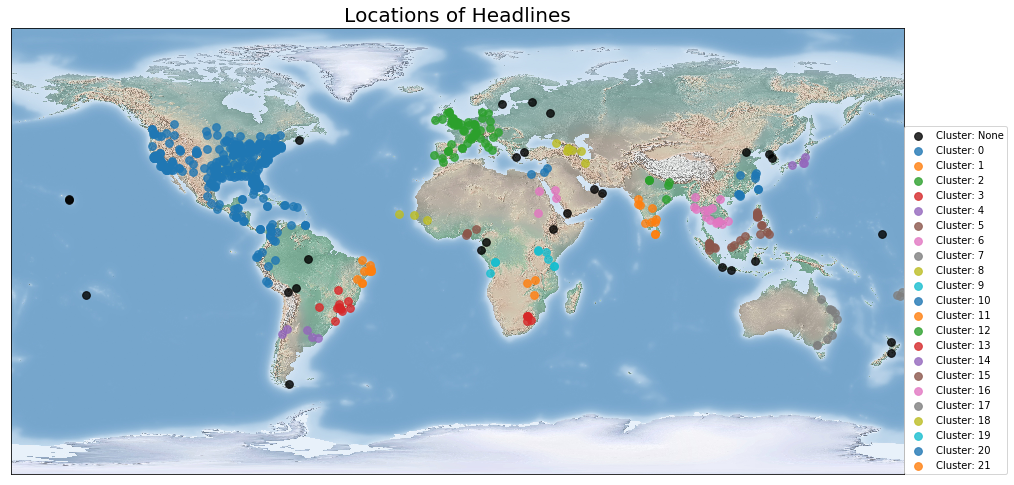

In [42]:
_ = plot_clusters(data)

In [44]:
from sklearn.cluster import KMeans

kmeans_clusterer = KMeans()
kmeans_clusterer

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
inertia_values = []

for k in range(1, 11):
    inertia_values.append(KMeans(n_clusters=k).fit(data[['latitude', 'longitude']]).inertia_)

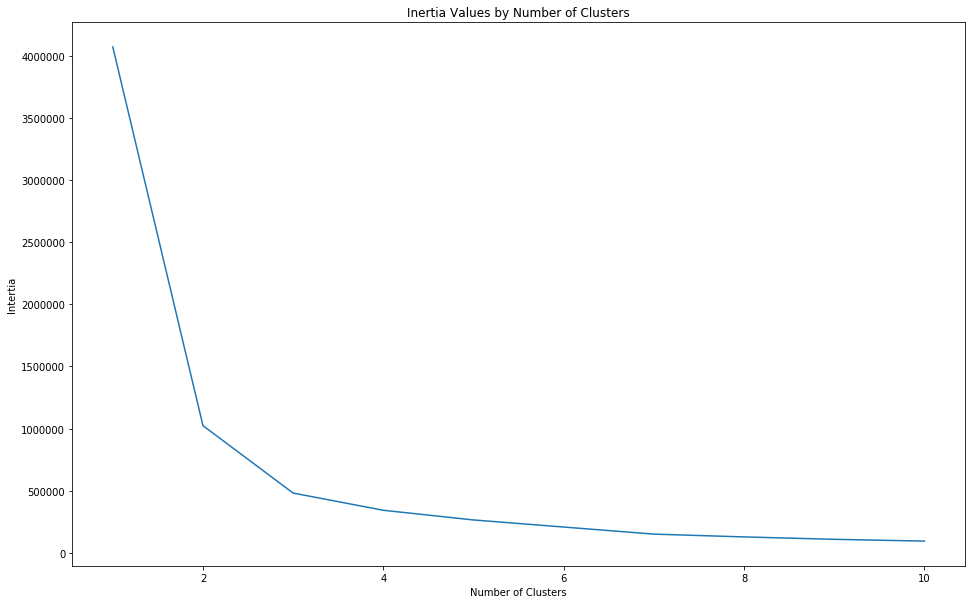

In [46]:
plt.figure(figsize=(16, 10))
plt.plot(range(1, 11), inertia_values);
plt.title('Inertia Values by Number of Clusters');
plt.xlabel('Number of Clusters');
plt.ylabel('Intertia');

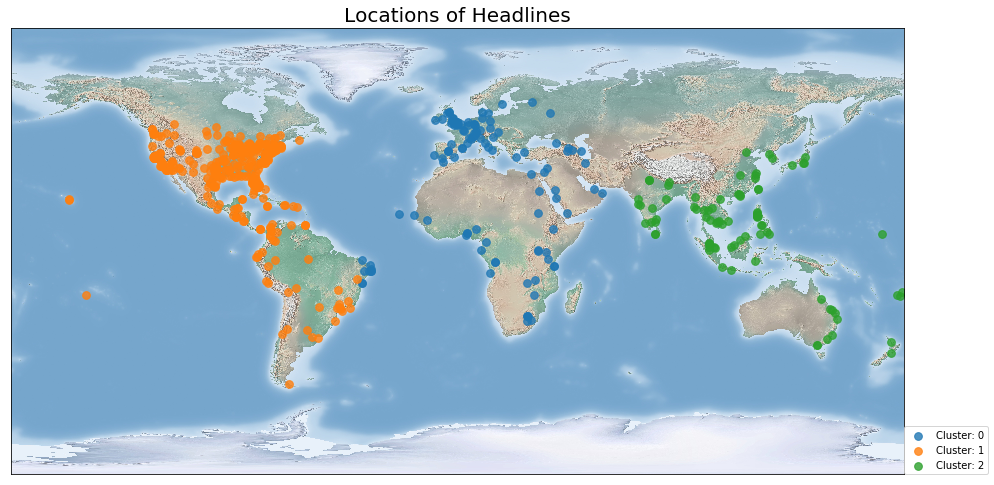

In [47]:
kmeans_clusterer = KMeans(n_clusters=3)
data = cluster_location(kmeans_clusterer, data)
plot_clusters(data)

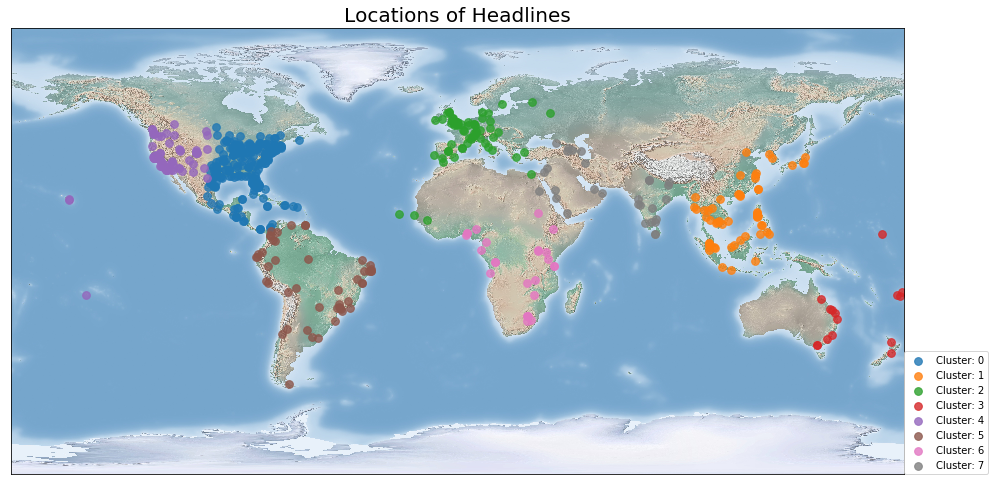

In [48]:
kmeans_clusterer = KMeans(n_clusters=8)
data = cluster_location(kmeans_clusterer, data)
plot_clusters(data)

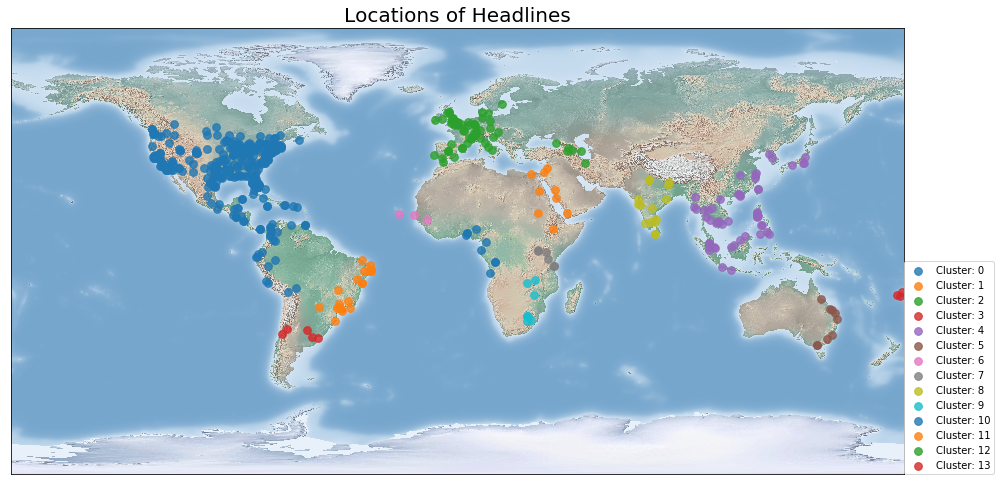

In [50]:
best_clusterer = DBSCAN(eps=9, metric="euclidean", min_samples=3)
data = cluster_location(best_clusterer, data)
plot_clusters(data[data['cluster'] != -1])
plt.savefig('entire_world_clustering.png')

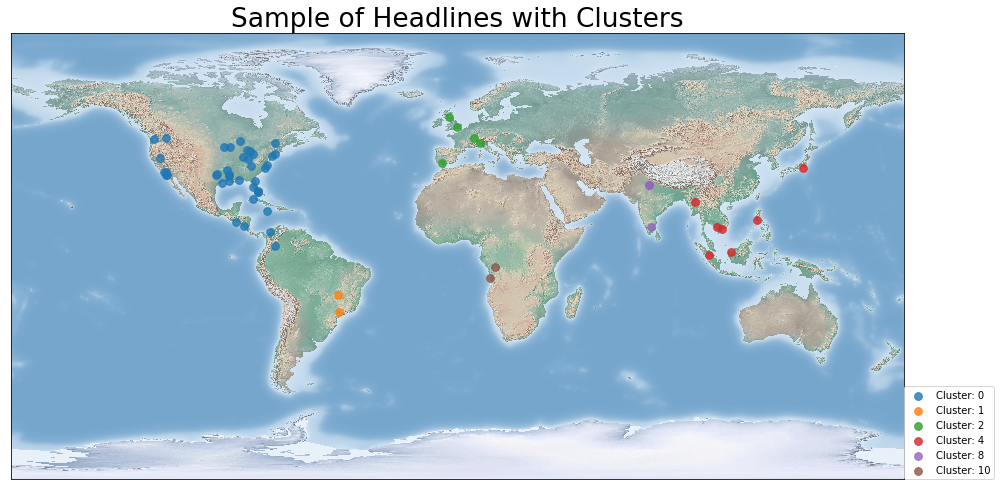

In [51]:
plot_clusters(data[data['cluster'] != -1].sample(frac=0.10))
ax = plt.gca()
plt.rcParams['font.size'] = 22
ax.set_title('Sample of Headlines with Clusters');

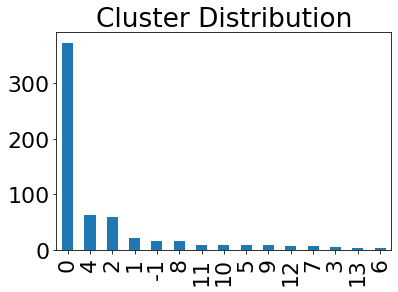

In [52]:
_ = data['cluster'].value_counts().plot.bar(title='Cluster Distribution')

In [53]:
data.groupby('countrycode')['cluster'].value_counts()['US']

cluster
 0    302
-1      2
Name: cluster, dtype: int64

In [54]:
data.to_csv('processed_headlines_clustered.csv')

In [55]:
data[['headline', 'city', 'latitude', 'longitude', 'countrycode', 'cluster']].head(10)

headline           city  latitude  \
0                 Zika Outbreak Hits Miami          Miami  25.77427   
1          Could Zika Reach New York City?  New York City  40.71427   
2        First Case of Zika in Miami Beach    Miami Beach  25.79065   
3  Mystery Virus Spreads in Recife, Brazil         Recife  -8.05389   
4  Dallas man comes down with case of Zika         Dallas  32.78306   
5        Trinidad confirms first Zika case       Trinidad -14.83333   
6   Zika Concerns are Spreading in Houston        Houston  29.76328   
7    Geneve Scientists Battle to Find Cure         Geneve  46.20222   
8    The CDC in Atlanta is Growing Worried        Atlanta  33.74900   
9       Zika Infested Monkeys in Sao Paulo      Sao Paulo -23.54750   

   longitude countrycode  cluster  
0  -80.19366          US        0  
1  -74.00597          US        0  
2  -80.13005          US        0  
3  -34.88111          BR        1  
4  -96.80667          US        0  
5  -64.90000          BO        0  
6  -95.36327          US        0  
7    6.14569          CH        2  
8  -84.38798          US        0  
9  -46.63611          BR        1

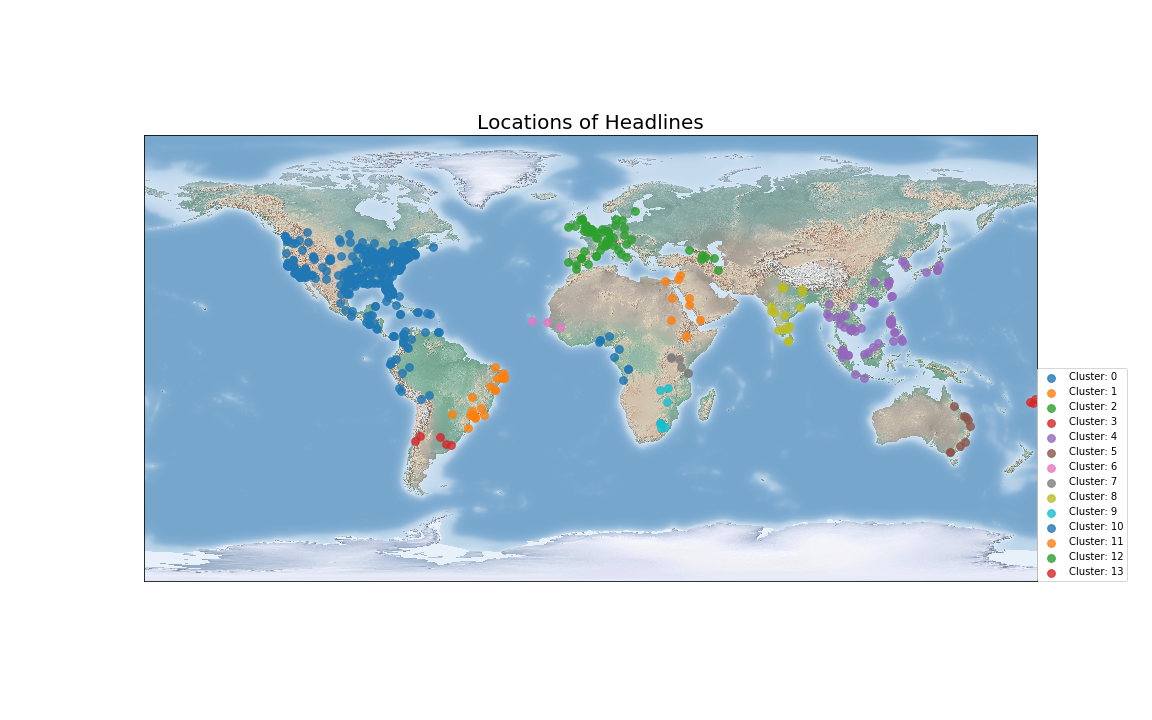

In [56]:
from IPython.display import Image

Image('entire_world_clustering.png')

In [58]:
data[['headline', 'city', 'latitude', 'longitude', 'countrycode', 'cluster']].to_csv('clustered_data.csv')

In [59]:
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

NameError: name 'variance' is not defined

In [6]:
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


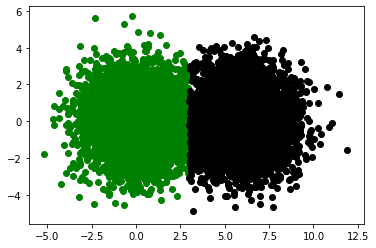

In [7]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'k'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

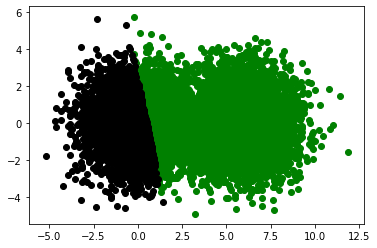

In [8]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

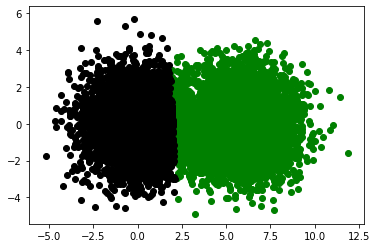

In [9]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)

    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

In [10]:
from sklearn.cluster import KMeans

In [11]:
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[1 1 1 ... 0 0 0]


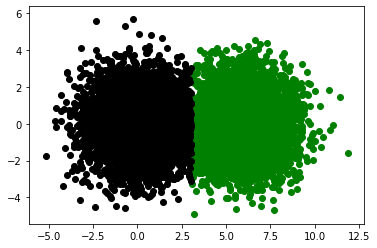

In [12]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts))
                      if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['g', 'k'][bs_index])
plt.show()

In [13]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 0
Dart at [-500, -500] is closest to bull's-eye 1


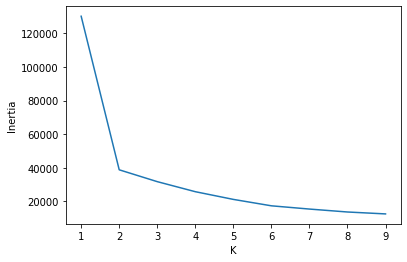

In [14]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

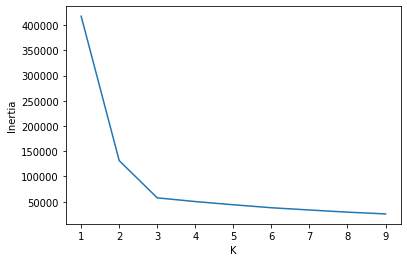

In [15]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])

inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

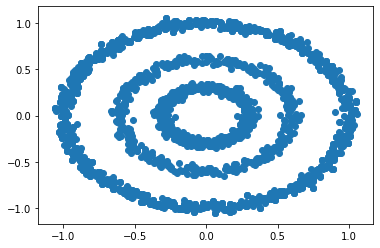

In [16]:
from sklearn.datasets import make_circles

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor,
                                noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

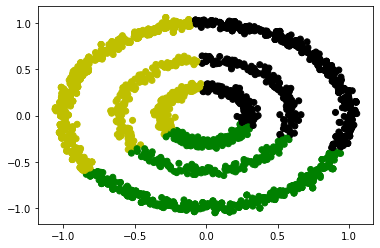

In [17]:
rocks = [[x_coordinates[i], y_coordinates[i]]
          for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in  rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [18]:
epsilon=0.1
min_points = 10

In [19]:
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
                    if euclidean(rocks[0], rock) <= epsilon]

In [20]:
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")

if num_neighbors >= min_points:
    print("It lies in a dense region.")
else:
    print("It does not lie in a dense region.")

The rock at index 0 has 40 neighbors.
It lies in a dense region.


In [23]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")

We found a dense cluster containing 41 rocks


In [24]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks)
                              if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)

dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

We expanded our cluster to include 781 rocks


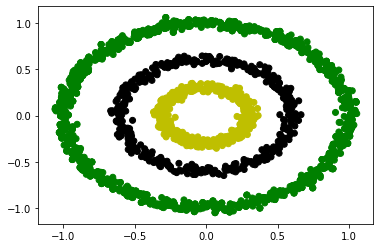

In [25]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [26]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
                  min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

In [27]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return .17 * num_blocks

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)

print(f"Manhattan distance is {distance} miles")

Manhattan distance is 4.42 miles


Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier


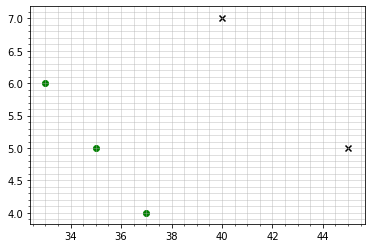

In [28]:
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3,
                  metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()


plt.show()

In [29]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() and is_negative_b.any():
        return 10
    else:
        return 2

points = [[-1, -1], [-10, -10], [-1000, -13435], [3,5], [5,-7]]

clusters = DBSCAN(eps=.1, min_samples=2,
                  metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier


In [30]:
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates,
                   'Cluster': rock_clusters})

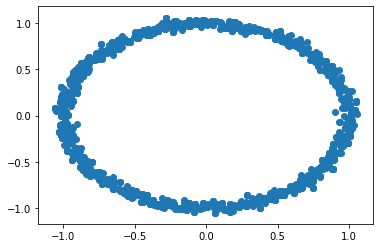

In [31]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2


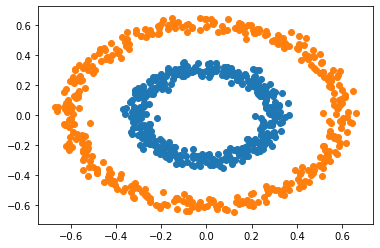

In [32]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue

    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)


plt.show()

In [1]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [2]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [3]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

NameError: name 'plt' is not defined

In [4]:
fig = plt.figure(figsize=(12, 8))
map_plotter.shadedrelief()
plt.show()

NameError: name 'plt' is not defined

In [5]:
fig = plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
               (40.4406, -79.9959), (38.6807, -108.9769),
               (37.8716, -112.2727), (40.7831, -73.9712)]

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

NameError: name 'plt' is not defined

In [6]:
fig = plt.figure(figsize=(12, 8))
map_ortho = Basemap(projection='ortho', lat_0=40, lon_0=-95)
map_ortho.scatter(longitudes, latitudes, latlon=True,
                  s=70)
map_ortho.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [7]:
fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)

map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [8]:
fig = plt.figure(figsize=(12, 8))
map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()

NameError: name 'plt' is not defined

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


NameError: name 'plt' is not defined